In [11]:
!pip install pandas matplotlib statsmodels


In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/weather.csv')

# Display the first few rows of the dataset
df.head()


,Data.Precipitation,Date.Full,Date.Month,Date.Week of,Date.Year,Station.City,Station.Code,Station.Location,Station.State,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80


In [13]:
# Convert the 'Date.Full' column to datetime format
df['Date.Full'] = pd.to_datetime(df['Date.Full'])

# Verify the conversion
df.dtypes


,0
Data.Precipitation,float64
Date.Full,datetime64[ns]
Date.Month,int64
Date.Week of,int64
Date.Year,int64
Station.City,object
Station.Code,object
Station.Location,object
Station.State,object
Data.Temperature.Avg Temp,int64


In [14]:
# Select relevant columns for time series analysis
df = df[['Date.Full', 'Data.Temperature.Avg Temp']]

# Set 'Date.Full' as the index (time series index)
df.set_index('Date.Full', inplace=True)

# Check the first few rows of the DataFrame to confirm
df.head()


,Data.Temperature.Avg Temp
Date.Full,
2016-01-03,39
2016-01-03,39
2016-01-03,46
2016-01-03,45
2016-01-03,34


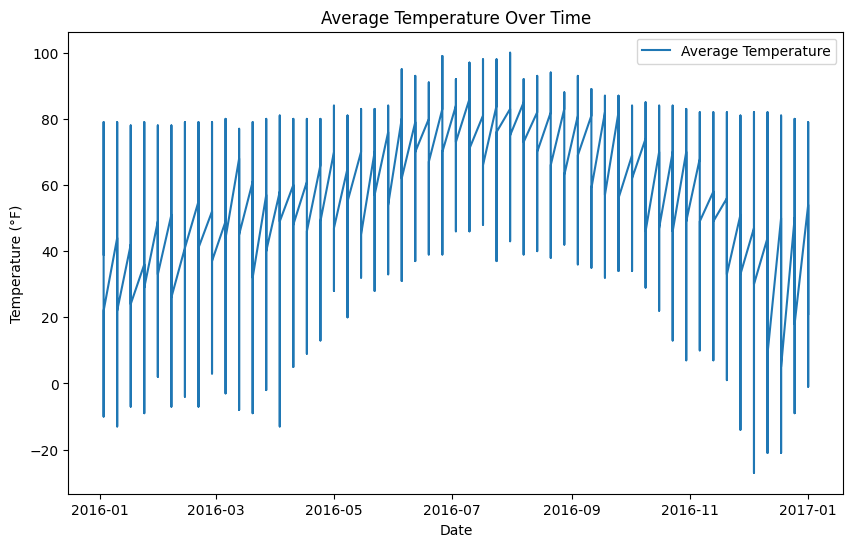

In [15]:
import matplotlib.pyplot as plt

# Plot the time series data (Average Temperature)
plt.figure(figsize=(10, 6))
plt.plot(df['Data.Temperature.Avg Temp'], label='Average Temperature')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test
result = adfuller(df['Data.Temperature.Avg Temp'].dropna())

# Output the results of the ADF test
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# Interpretation of the results
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")


ADF Statistic: -7.075031708538977
p-value: 4.826642960309509e-10
Critical Values: {'1%': -3.4307416819711927, '5%': -2.8617131077797886, '10%': -2.5668621408685914}
The series is stationary.


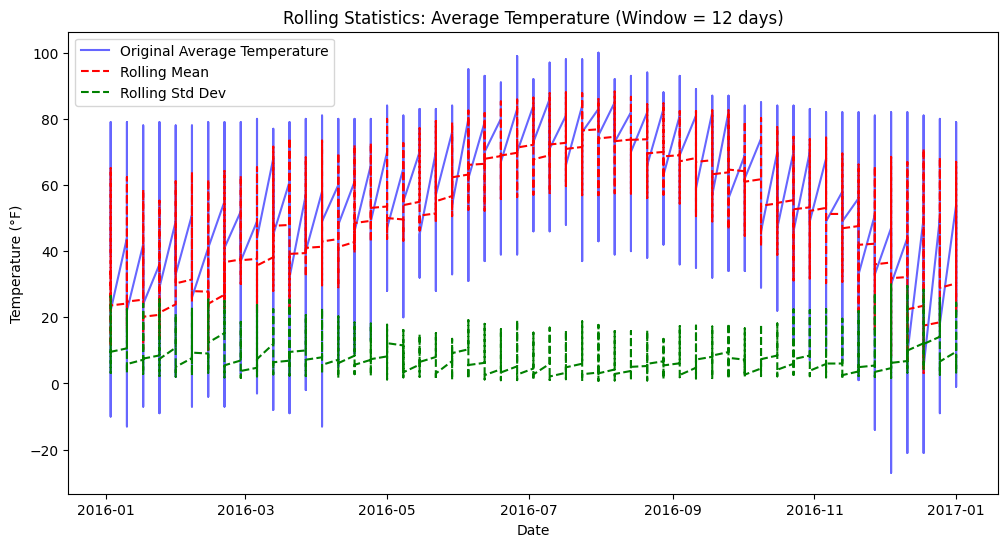

In [19]:
# Plot the rolling mean and rolling standard deviation of the original series
window = 12  # Rolling window size

# Rolling mean and standard deviation
rolling_mean = df['Data.Temperature.Avg Temp'].rolling(window=window).mean()
rolling_std = df['Data.Temperature.Avg Temp'].rolling(window=window).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Data.Temperature.Avg Temp'], label='Original Average Temperature', color='blue', alpha=0.6)
plt.plot(rolling_mean, label='Rolling Mean', color='red', linestyle='--')
plt.plot(rolling_std, label='Rolling Std Dev', color='green', linestyle='--')
plt.title(f'Rolling Statistics: Average Temperature (Window = {window} days)')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


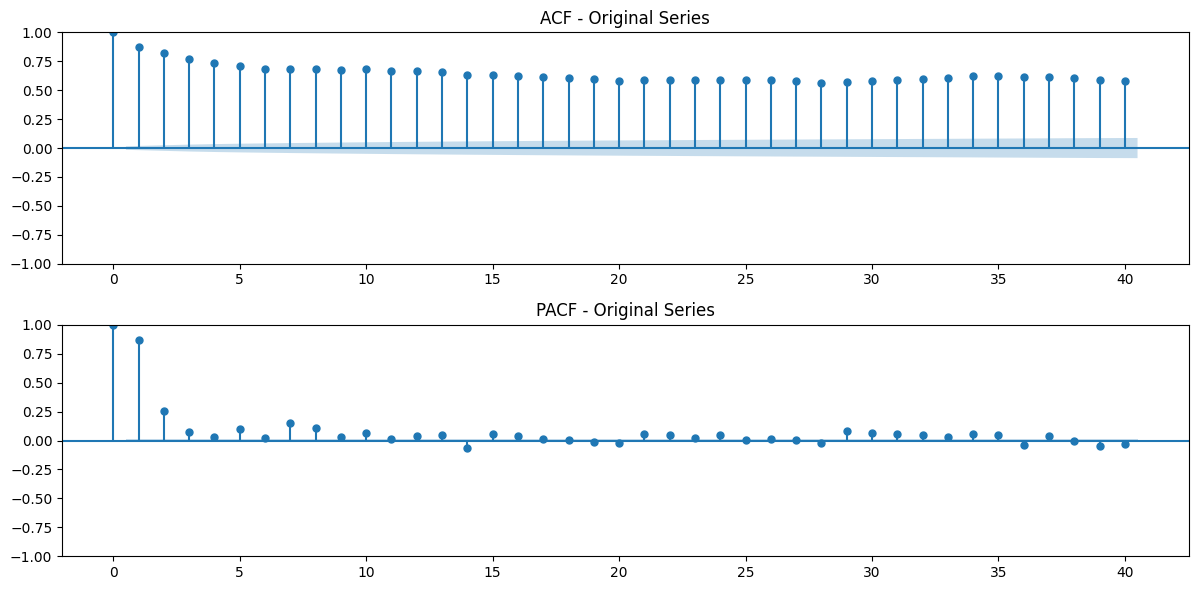

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the original time series
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(df['Data.Temperature.Avg Temp'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF - Original Series')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(df['Data.Temperature.Avg Temp'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF - Original Series')

plt.tight_layout()
plt.show()

# Plot ACF and PACF for the differenced time series
plt.figure(figsize=(12, 6))



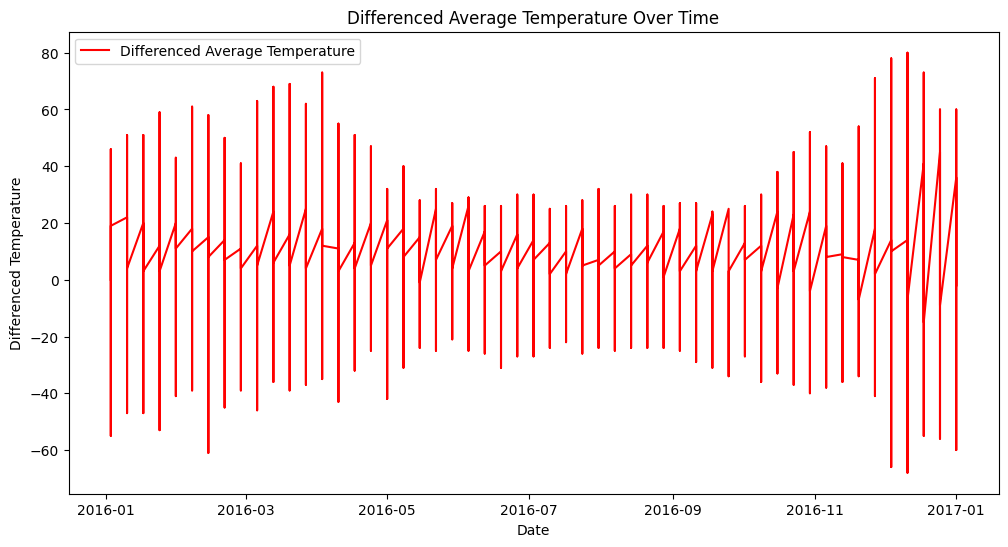

ADF Statistic: -24.49
p-value: 0.0000


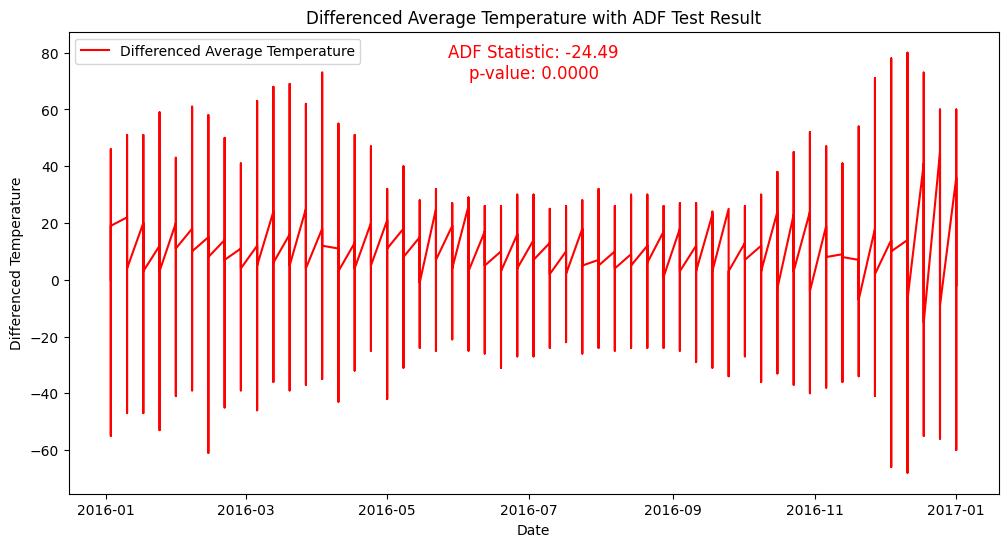

In [24]:
# Apply differencing
df['Differenced'] = df['Data.Temperature.Avg Temp'].diff()

# Drop NaN values after differencing
df_differenced = df['Differenced'].dropna()

# Plotting the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Differenced'], label='Differenced Average Temperature', color='red')
plt.title('Differenced Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Temperature')
plt.legend()
plt.show()

# Perform ADF test for the differenced series
from statsmodels.tsa.stattools import adfuller
result_diff = adfuller(df['Differenced'].dropna())

# Print ADF test result
print(f"ADF Statistic: {result_diff[0]:.2f}")
print(f"p-value: {result_diff[1]:.4f}")

# Plotting ADF result on the differenced time series
plt.figure(figsize=(12, 6))
plt.plot(df['Differenced'], label='Differenced Average Temperature', color='red')
plt.title('Differenced Average Temperature with ADF Test Result')

# Add ADF test result annotation
plt.annotate(f'ADF Statistic: {result_diff[0]:.2f}\np-value: {result_diff[1]:.4f}',
             xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=12, color='red')

plt.xlabel('Date')
plt.ylabel('Differenced Temperature')
plt.legend()
plt.show()
